In [15]:
img_dir = './data/downloaded/ericcahan/Alamar, Ciudad De La Habana, Cuba - Sunset 8:11pm.jpg'

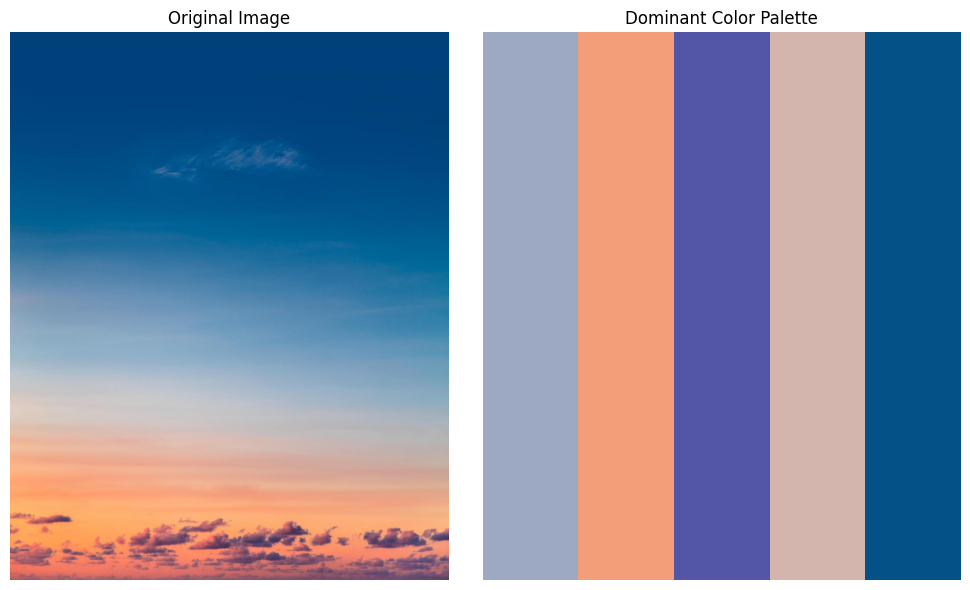

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_dir)

# Convert image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Apply k-means clustering to extract dominant colors
num_colors = 5
pixels = hsv_image.reshape(-1, 3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8
centers = np.uint8(centers)

# Extract dominant colors
dominant_colors = centers

# Create a color palette with the dominant colors
color_palette = np.zeros((50, num_colors, 3), dtype=np.uint8)
for i, color in enumerate(dominant_colors):
    color_palette[:, i, :] = color

# Display the original image and the color palette
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_palette, cv2.COLOR_HSV2RGB), aspect='auto')
plt.title('Dominant Color Palette')
plt.axis('off')

plt.tight_layout()
plt.show()


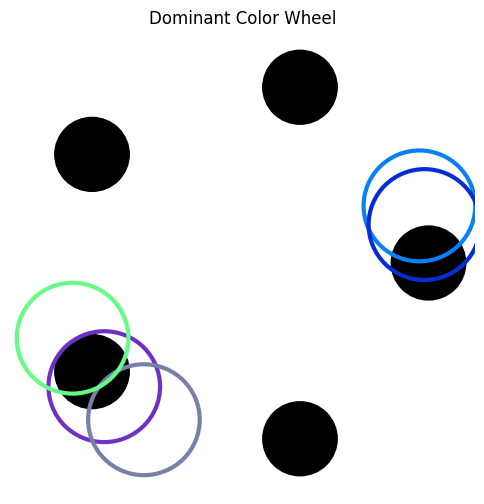

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to generate a color wheel with HSV colors
def generate_color_wheel(num_colors):
    hues = np.linspace(0, 1, num_colors + 1)[:-1]
    saturations = np.ones(num_colors) * 0.8
    values = np.ones(num_colors) * 0.9
    color_wheel_hsv = np.column_stack((hues, saturations, values))
    color_wheel_rgb = np.array([cv2.cvtColor(np.uint8([[hsv]]), cv2.COLOR_HSV2RGB)[0][0] for hsv in color_wheel_hsv])
    return color_wheel_rgb

# Load an image and extract dominant colors
def extract_dominant_colors(image_path, num_colors):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    pixels = hsv_image.reshape(-1, 3)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, _, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    dominant_colors = centers.astype(np.uint8)
    return dominant_colors

# Number of dominant colors
num_colors = 5

# Generate the color wheel
color_wheel = generate_color_wheel(num_colors)

# Directory containing the images
image_directory = '/path/to/your/images'

# Extract dominant colors from an image in the directory
image_path = img_dir
dominant_colors = extract_dominant_colors(image_path, num_colors)

# Create a figure and axis
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Plot the color wheel with filled HSV colors
for i, hsv_color in enumerate(color_wheel):
    angle_radians = i * 2 * np.pi / num_colors
    x = 0.5 + 0.4 * np.cos(angle_radians)
    y = 0.5 + 0.4 * np.sin(angle_radians)
    color_circle = Circle((x, y), 0.08, color=hsv_color / 255.0, fill=True)
    ax.add_artist(color_circle)

# Plot the dominant colors as outlined circles
for i, hsv_color in enumerate(dominant_colors):
    angle_radians = hsv_color[0] * 2 * np.pi / 180.0
    x = 0.5 + 0.4 * np.cos(angle_radians)
    y = 0.5 + 0.4 * np.sin(angle_radians)
    dominant_circle = Circle((x, y), 0.12, color=hsv_color / 255.0, fill=False, linewidth=3)
    ax.add_artist(dominant_circle)

# Set plot limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Set the title and display the plot
plt.title('Dominant Color Wheel')
plt.show()


In [ ]:


def colour_wheel(samples=1024, clip_circle=True, method='Colour'):
    xx, yy = np.meshgrid(
        np.linspace(-1, 1, samples), np.linspace(-1, 1, samples))

    S = np.sqrt(xx ** 2 + yy ** 2)    
    H = (np.arctan2(xx, yy) + np.pi) / (np.pi * 2)

    HSV = colour.utilities.tstack([H, S, np.ones(H.shape)])
    RGB = colour.HSV_to_RGB(HSV)

    if clip_circle == True:
        RGB[S > 1] = 0
        A = np.where(S > 1, 0, 1)
    else:
        A = np.ones(S.shape)

    if method.lower()== 'matplotlib':
        RGB = colour.utilities.orient(RGB, '90 CW')
    elif method.lower()== 'nuke':
        RGB = colour.utilities.orient(RGB, 'Flip')
        RGB = colour.utilities.orient(RGB, '90 CW')

    R, G, B = colour.utilities.tsplit(RGB)
    
    return colour.utilities.tstack([R, G, B, A])